In [2]:
%run IDM_helper_functions.ipynb

In [3]:
from pyddm import Model
from pyddm.models import DriftConstant, DriftLinear, NoiseConstant, BoundConstant, OverlayNonDecision, ICPointSourceCenter
from pyddm.functions import fit_adjust_model, display_model

from pyddm import Fittable, Fitted, Sample
from pyddm.models import LossRobustBIC, LossBIC, LossLikelihood, LossRobustLikelihood,LossSquaredError
from pyddm.functions import fit_adjust_model

In [82]:
import pandas as pd
import os
import pyreadr
import seaborn as sns
import scipy

In [43]:
data_dir = "/Users/wangjiashun/Desktop/Evans2021/Rae2014/dataBySubject/sub"
sample_size = 34

In [42]:
#samp.to_pandas_dataframe()

In [72]:
par_fitted_A = np.zeros((sample_size,4))

for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Speed"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_A[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_A[i,:])


0


Info: Params [1.17421282 6.91022374 1.89145769 0.14067359] gave -449.186915975299


[1.17421282 1.89145769 0.14067359 6.91022374]
1


Info: Params [ 0.74813597 11.06257182  4.63859392  0.10893652] gave -1022.4637418269509


[ 0.74813597  4.63859392  0.10893652 11.06257182]
2


Info: Params [0.17303563 7.95837073 1.40547921 0.1007074 ] gave -296.49004970751963


[0.17303563 1.40547921 0.1007074  7.95837073]
3


Info: Params [ 2.22493478 10.03459617  0.88410134  0.27160046] gave -1873.8783922384682


[ 2.22493478  0.88410134  0.27160046 10.03459617]
4


Info: Params [0.25178743 8.29256299 1.44973019 0.10097142] gave -126.27960148226126


[0.25178743 1.44973019 0.10097142 8.29256299]
5


Info: Params [ 1.67813831 10.80437988  1.76503498  0.18949804] gave -765.0750059780997


[ 1.67813831  1.76503498  0.18949804 10.80437988]
6


Info: Params [ 1.23723584 13.71782763  8.10888757  0.11861241] gave -1551.750090928424


[ 1.23723584  8.10888757  0.11861241 13.71782763]
7


Info: Params [ 1.30049335 14.77360233  8.21726107  0.10664528] gave -1642.197096680304


[ 1.30049335  8.21726107  0.10664528 14.77360233]
8


Info: Params [1.58230981 9.64213535 1.62302026 0.22793545] gave -619.333731968622


[1.58230981 1.62302026 0.22793545 9.64213535]
9


Info: Params [ 0.83213208 11.45233609  4.08634603  0.10654868] gave -1093.4781019200095


[ 0.83213208  4.08634603  0.10654868 11.45233609]
10


Info: Params [0.1342732  7.7545058  1.30125975 0.10075   ] gave -360.252156151766


[0.1342732  1.30125975 0.10075    7.7545058 ]
11


Info: Params [0.5411675  9.25868382 2.23628719 0.11934174] gave -712.3844756237231


[0.5411675  2.23628719 0.11934174 9.25868382]
12


Info: Params [0.26635412 8.00653227 1.71534578 0.10036784] gave -169.37436768060462


[0.26635412 1.71534578 0.10036784 8.00653227]
13


Info: Params [ 0.         10.25127671  0.80083857  0.14164687] gave -338.1474589137254


[ 0.          0.80083857  0.14164687 10.25127671]
14


Info: Params [1.0213936  8.85942904 6.10358002 0.11332159] gave -631.2262688007912


[1.0213936  6.10358002 0.11332159 8.85942904]
15


Info: Params [3.26962636e-03 8.34498679e+00 1.26638558e+00 1.28958384e-01] gave -187.38062989574615


[3.26962636e-03 1.26638558e+00 1.28958384e-01 8.34498679e+00]
16


Info: Params [ 0.38953655 10.99244779  1.5738644   0.10687758] gave -861.0939296235531


[ 0.38953655  1.5738644   0.10687758 10.99244779]
17


Info: Params [0.33422844 6.38302406 0.84392903 0.12188058] gave 75.01336811486374


[0.33422844 0.84392903 0.12188058 6.38302406]
18


Info: Params [2.29004976 6.12647574 1.68510839 0.32802202] gave -1141.8165421634596


[2.29004976 1.68510839 0.32802202 6.12647574]
19


Info: Params [0.27310427 9.91594388 2.23216094 0.10041361] gave -657.1057193026455


[0.27310427 2.23216094 0.10041361 9.91594388]
20


Info: Params [0.20118462 9.62068933 1.24898164 0.10429528] gave -495.25028879247674


[0.20118462 1.24898164 0.10429528 9.62068933]
21


Info: Params [0.22682711 6.79858062 1.54403853 0.10076735] gave 167.2885354526794


[0.22682711 1.54403853 0.10076735 6.79858062]
22


Info: Params [0.         8.00252555 0.50024678 0.16448347] gave -885.9839586697765


[0.         0.50024678 0.16448347 8.00252555]
23


Info: Params [0.0580328  8.47045179 1.56216155 0.10057599] gave -111.53446254144197


[0.0580328  1.56216155 0.10057599 8.47045179]
24


Info: Params [0.17283199 5.23282338 0.50116251 0.15798446] gave -226.1824879312361


[0.17283199 0.50116251 0.15798446 5.23282338]
25


Info: Params [ 0.40689841 11.84224102  2.74444477  0.10372979] gave -512.5039709830537


[ 0.40689841  2.74444477  0.10372979 11.84224102]
26


Info: Params [ 0.79961618 11.99450844  2.69734519  0.10190495] gave -584.4211105739278


[ 0.79961618  2.69734519  0.10190495 11.99450844]
27


Info: Params [ 0.10898098 10.26396688  2.409594    0.10112467] gave -529.8301220054857


[ 0.10898098  2.409594    0.10112467 10.26396688]
28


Info: Params [0.22040996 8.36574713 1.31045951 0.10055813] gave -101.36914912543621


[0.22040996 1.31045951 0.10055813 8.36574713]
29


Info: Params [0.09389094 7.53148026 1.44914785 0.10009484] gave -0.8460498239265704


[0.09389094 1.44914785 0.10009484 7.53148026]
30


Info: Params [0.13136637 8.0484126  1.28982859 0.10173884] gave -134.61956493576983


[0.13136637 1.28982859 0.10173884 8.0484126 ]
31


Info: Params [0.35390098 8.22729129 1.05431266 0.12404186] gave -126.15538987510972


[0.35390098 1.05431266 0.12404186 8.22729129]
32


Info: Params [0.09386081 7.53013222 1.44904304 0.10041532] gave -0.8460332985676935


[0.09386081 1.44904304 0.10041532 7.53013222]
33


Info: Params [7.80646863e-03 8.82936119e+00 1.61140362e+00 1.00719877e-01] gave -130.78047634053502


[7.80646863e-03 1.61140362e+00 1.00719877e-01 8.82936119e+00]


In [74]:
par_fitted_B = np.zeros((sample_size,4))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Accuracy"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftLinear(drift=Fittable(minval=0, maxval=6),
                                    t = 0,
                                    x=Fittable(minval=-20, maxval=20)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.5, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    par_fitted_B[i,3] = np.array(model_fit.parameters()['drift']['x'])
    
    print(par_fitted_B[i,:])


0


Info: Params [1.80383622 5.40646639 1.71276517 0.22298284] gave -569.9201664184214


[1.80383622 1.71276517 0.22298284 5.40646639]
1


Info: Params [1.55146604 8.95451659 2.50298264 0.20023399] gave -1191.5213082044506


[1.55146604 2.50298264 0.20023399 8.95451659]
2


Info: Params [0.25791625 7.34595743 1.81736998 0.10011068] gave -32.224319842747576


[0.25791625 1.81736998 0.10011068 7.34595743]
3


Info: Params [2.38732935 9.92876275 1.30155563 0.2590394 ] gave -1910.29496070879


[2.38732935 1.30155563 0.2590394  9.92876275]
4


Info: Params [0.47262056 7.34293855 1.8683728  0.10091895] gave -58.75067836671833


[0.47262056 1.8683728  0.10091895 7.34293855]
5


Info: Params [ 2.11656234 11.59977038  1.66229092  0.22936229] gave -959.2125867859659


[ 2.11656234  1.66229092  0.22936229 11.59977038]
6


Info: Params [ 1.572892   11.47889626  9.08030381  0.11215194] gave -1376.4637509651416


[ 1.572892    9.08030381  0.11215194 11.47889626]
7


Info: Params [1.77947914 3.37562524 0.87001311 0.25505102] gave -347.07771511776633


[1.77947914 0.87001311 0.25505102 3.37562524]
8


Info: Params [1.93805861 9.61258353 3.14746727 0.19642453] gave -705.4390293046225


[1.93805861 3.14746727 0.19642453 9.61258353]
9


Info: Params [1.60132639 7.70355742 1.0337069  0.24011643] gave -984.5093505973354


[1.60132639 1.0337069  0.24011643 7.70355742]
10


Info: Params [0.10810957 7.84925789 1.43353633 0.10042405] gave -86.3217281983313


[0.10810957 1.43353633 0.10042405 7.84925789]
11


Info: Params [1.27849195 2.89384789 1.06936272 0.22542279] gave 486.78666909193345


[1.27849195 1.06936272 0.22542279 2.89384789]
12


Info: Params [0.82661494 6.97613581 2.55913064 0.10005232] gave -180.25500086667253


[0.82661494 2.55913064 0.10005232 6.97613581]
13


Info: Params [0.5621556  3.70618757 0.58583327 0.17034758] gave 35.16851525159758


[0.5621556  0.58583327 0.17034758 3.70618757]
14


Info: Params [1.20950444 8.55082794 2.18228961 0.23841345] gave -763.2119203058638


[1.20950444 2.18228961 0.23841345 8.55082794]
15


Info: Params [0.59269796 4.80827077 0.82637841 0.17832658] gave 362.69769025104324


[0.59269796 0.82637841 0.17832658 4.80827077]
16


Info: Params [0.49511789 9.32874468 1.99733842 0.10095206] gave -593.1889449816678


[0.49511789 1.99733842 0.10095206 9.32874468]
17


Info: Params [0.89736753 4.60707706 1.61889158 0.10010489] gave 373.64540478064333


[0.89736753 1.61889158 0.10010489 4.60707706]
18


Info: Params [2.51095522 6.70044249 1.81196812 0.34020736] gave -1477.7516247881408


[2.51095522 1.81196812 0.34020736 6.70044249]
19


Info: Params [0.46927544 8.92691199 2.71647018 0.10005745] gave -505.85686160134793


[0.46927544 2.71647018 0.10005745 8.92691199]
20


Info: Params [0.02895257 7.66143727 1.1977406  0.10029237] gave -157.5819066221058


[0.02895257 1.1977406  0.10029237 7.66143727]
21


Info: Params [0.63922339 4.79217816 1.63420796 0.10554438] gave 588.027507346128


[0.63922339 1.63420796 0.10554438 4.79217816]
22


Info: Params [0.1826792  5.96605614 0.72957722 0.14690444] gave 72.98057421664299


[0.1826792  0.72957722 0.14690444 5.96605614]
23


Info: Params [0.38131826 6.53481437 2.09511517 0.10065142] gave 83.53693380123144


[0.38131826 2.09511517 0.10065142 6.53481437]
24


Info: Params [0.73017472 3.35430647 1.71140796 0.10132989] gave 576.5947655353673


[0.73017472 1.71140796 0.10132989 3.35430647]
25


Info: Params [0.61888165 8.46176926 1.96401149 0.10169639] gave -197.73103784793034


[0.61888165 1.96401149 0.10169639 8.46176926]
26


Info: Params [1.5987144  3.89819854 0.91144142 0.21115581] gave -155.94569927100846


[1.5987144  0.91144142 0.21115581 3.89819854]
27


Info: Params [ 0.         12.41177896  4.62494204  0.10056262] gave -526.6332465474287


[ 0.          4.62494204  0.10056262 12.41177896]
28


Info: Params [0.46701538 6.65362819 1.98963297 0.10059968] gave 75.52617535860352


[0.46701538 1.98963297 0.10059968 6.65362819]
29


Info: Params [0.12194416 5.84904967 1.41413785 0.10066247] gave 267.716743090177


[0.12194416 1.41413785 0.10066247 5.84904967]
30


Info: Params [0.06580085 7.43549386 1.06033706 0.11480041] gave 5.414209350994803


[0.06580085 1.06033706 0.11480041 7.43549386]
31


Info: Params [0.19841301 6.23932681 0.84398327 0.14475168] gave 83.29990386243871


[0.19841301 0.84398327 0.14475168 6.23932681]
32


Info: Params [0.12183883 5.86697255 1.42024848 0.10010899] gave 267.7362427272166


[0.12183883 1.42024848 0.10010899 5.86697255]
33


Info: Params [0.49987654 3.38261795 1.75337703 0.10814333] gave 667.3689498406866


[0.49987654 1.75337703 0.10814333 3.38261795]


In [140]:
df_SAT = pd.read_csv("OUMresultRae2014.csv")
participant = [i for i in range(1,sample_size+1)]*8
df_SAT["participant"] = participant

df_SAT = df_SAT[["values", "parameter","condition", "participant"]].pivot(index = ["participant", "condition"], columns='parameter')

In [141]:
df0 = pd.DataFrame(np.array(df_SAT["values"]), 
                   columns = ['Boundary Separation','Drift Rate',"Effective Inhibition",'Non-decision Time'])

In [142]:
df0["SAT"] = ["Accuracy", "Speed"]*sample_size
df_SAT = df0


In [143]:
df_SAT.to_csv("OUMresultRae2014.csv")

In [144]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])

In [145]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                       var_name = "Parameter", value_name = "Difference")

In [148]:
df_dif_melted.to_csv("OUMdifResultRae2014.csv") 

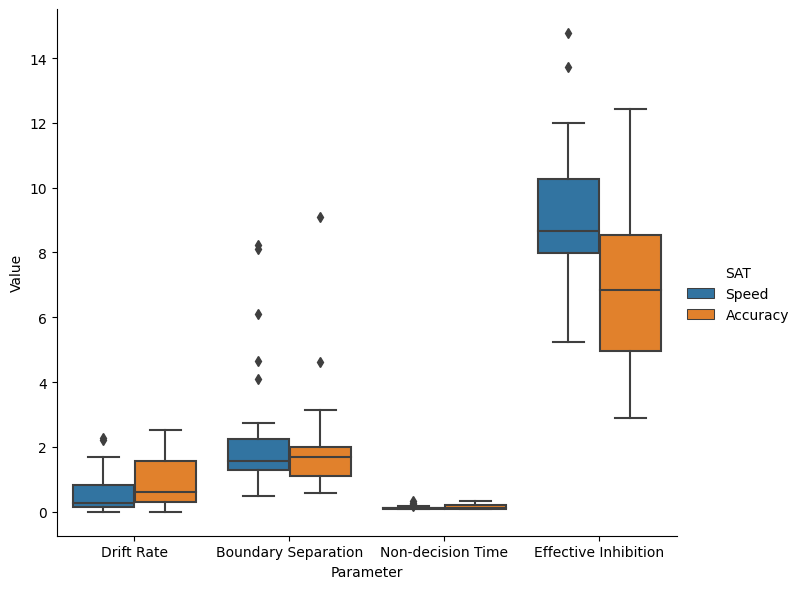

In [146]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6, hue_order = ["Speed", "Accuracy"])

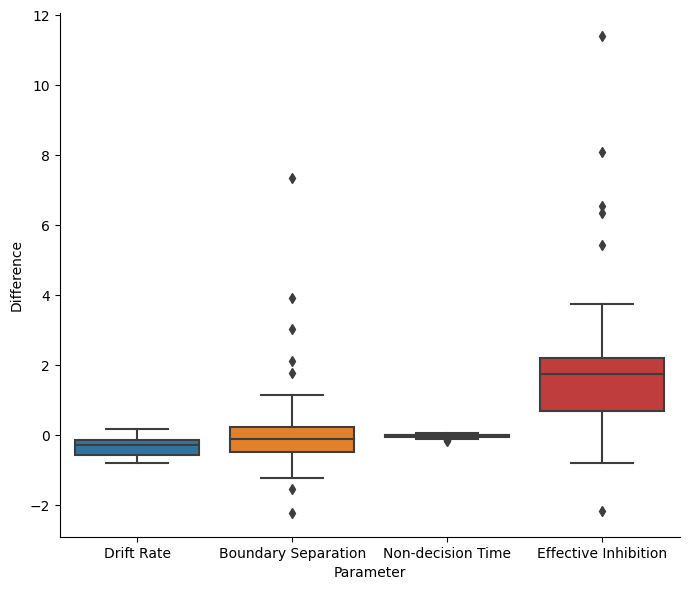

In [147]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [88]:
print(scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0]))
print(scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1]))
print(scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2]))
print(scipy.stats.ttest_rel(par_fitted_A[:,3], par_fitted_B[:,3]))

Ttest_relResult(statistic=-6.541571557579756, pvalue=1.977355908947513e-07)

### Fit the same data with DDM

In [132]:
par_fitted_A = np.zeros((sample_size,3))

for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Speed"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")

    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.1, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_A[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_A[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_A[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_A[i,:])


0


Info: Params [1.50330719 0.5787267  0.22964575] gave -220.77676732271914


[1.50330719 0.5787267  0.22964575]
1


Info: Params [1.10754235 0.50493478 0.22899951] gave -365.26043321336937


[1.10754235 0.50493478 0.22899951]
2


Info: Params [0.32268708 0.48299672 0.16495467] gave 12.621633336866651


[0.32268708 0.48299672 0.16495467]
3


Info: Params [2.40244535 0.48064538 0.28377951] gave -1695.3108534348562


[2.40244535 0.48064538 0.28377951]
4


Info: Params [0.51398479 0.48568507 0.16514085] gave -3.4051601417643447


[0.51398479 0.48568507 0.16514085]
5


Info: Params [2.05004846 0.51483545 0.23736101] gave -609.2538695765134


[2.05004846 0.51483545 0.23736101]
6


Info: Params [1.61583561 0.44216296 0.27420468] gave -1160.610225397434


[1.61583561 0.44216296 0.27420468]
7


Info: Params [1.82180408 0.42477695 0.25705067] gave -1330.4211664980771


[1.82180408 0.42477695 0.25705067]
8


Info: Params [1.71240946 0.51207358 0.27630141] gave -443.83312431131856


[1.71240946 0.51207358 0.27630141]
9


Info: Params [1.2862358  0.45645653 0.24067783] gave -591.6619425408196


[1.2862358  0.45645653 0.24067783]
10


Info: Params [0.22323048 0.46646917 0.16561869] gave -102.24228300172803


[0.22323048 0.46646917 0.16561869]
11


Info: Params [0.89885354 0.49660694 0.20834127] gave -230.15978782129696


[0.89885354 0.49660694 0.20834127]
12


Info: Params [0.45344725 0.52514736 0.16538426] gave 227.74127705824412


[0.45344725 0.52514736 0.16538426]
13


Info: Params [0.07488553 0.40422032 0.16930427] gave -301.63111731626316


[0.07488553 0.40422032 0.16930427]
14


Info: Params [1.38532671 0.52271886 0.32062354] gave -234.89309999245245


[1.38532671 0.52271886 0.32062354]
15


Info: Params [0.15573466 0.49747165 0.17465862] gave 71.47750104274829


[0.15573466 0.49747165 0.17465862]
16


Info: Params [0.71671965 0.42999921 0.17201528] gave -625.9511118065252


[0.71671965 0.42999921 0.17201528]
17


Info: Params [0.44520259 0.48411464 0.15582977] gave 101.67710535349293


[0.44520259 0.48411464 0.15582977]
18


Info: Params [2.30387541 0.63444787 0.39653758] gave -878.9733520260008


[2.30387541 0.63444787 0.39653758]
19


Info: Params [0.46829932 0.48804699 0.17655446] gave -120.83187561965393


[0.46829932 0.48804699 0.17655446]
20


Info: Params [0.2637108  0.41682357 0.17494573] gave -428.8250483771603


[0.2637108  0.41682357 0.17494573]
21


Info: Params [0.47867059 0.53502168 0.17741301] gave 405.2295909892192


[0.47867059 0.53502168 0.17741301]
22


Info: Params [0.         0.36610964 0.17630815] gave -900.2218711788285


[0.         0.36610964 0.17630815]
23


Info: Params [0.22054828 0.47586148 0.17739857] gave 8.875862015787805


[0.22054828 0.47586148 0.17739857]
24


Info: Params [0.19190758 0.38963182 0.17020329] gave -252.28771914957915


[0.19190758 0.38963182 0.17020329]
25


Info: Params [0.8192103  0.45947687 0.18877836] gave -272.71051067774505


[0.8192103  0.45947687 0.18877836]
26


Info: Params [1.16824355 0.48239191 0.17370549] gave -324.7177160160701


[1.16824355 0.48239191 0.17370549]
27


Info: Params [0.18723485 0.46388728 0.18068117] gave -153.37799065246153


[0.18723485 0.46388728 0.18068117]
28


Info: Params [0.42704328 0.47425904 0.1646798 ] gave -27.629719720089604


[0.42704328 0.47425904 0.1646798 ]
29


Info: Params [0.19794924 0.49749692 0.17268706] gave 122.98154961823235


[0.19794924 0.49749692 0.17268706]
30


Info: Params [0.27317771 0.45149684 0.17440062] gave -71.87710041782901


[0.27317771 0.45149684 0.17440062]
31


Info: Params [0.46549343 0.45584499 0.17587219] gave -84.24644906896748


[0.46549343 0.45584499 0.17587219]
32


Info: Params [0.19794925 0.49749692 0.17232311] gave 122.98154961823238


[0.19794925 0.49749692 0.17232311]
33


Info: Params [0.09930973 0.46915831 0.17986208] gave -18.187975218488024


[0.09930973 0.46915831 0.17986208]


In [133]:
par_fitted_B = np.zeros((sample_size,3))
for i in range(sample_size):
    print(i)
    
    path = os.path.join(data_dir+str(i+1)+".csv")
    df = pd.read_csv(path, sep = ",")
    df = df[df["Cond"]=="Accuracy"] # A condition
    df = df[df["Time"]<4]
    
    samp = Sample.from_pandas_dataframe(df, rt_column_name="Time", correct_column_name="Correct")
    
    model_fit = Model(name='Simple model (fitted)',
                  drift=DriftConstant(drift=Fittable(minval=0, maxval=6)),
                  noise=NoiseConstant(noise=1),
                  bound=BoundConstant(B=Fittable(minval=0.1, maxval=10)),
                  overlay=OverlayNonDecision(nondectime=Fittable(minval=0.1, maxval=1)),
                  dx=.001, dt=.001, T_dur=4)
                  #dx=.001, dt=.001, T_dur=3)

    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)

    par_fitted_B[i,0] = np.array(model_fit.parameters()['drift']['drift'])
    par_fitted_B[i,1] = np.array(model_fit.parameters()['bound']['B'])
    par_fitted_B[i,2] = np.array(model_fit.parameters()['overlay']['nondectime'])
    
    print(par_fitted_B[i,:])


0


Info: Params [1.89732998 0.67291971 0.29505039] gave -226.32153549842727


[1.89732998 0.67291971 0.29505039]
1


Info: Params [1.92798294 0.54773626 0.29465861] gave -848.4613462822933


[1.92798294 0.54773626 0.29465861]
2


Info: Params [0.46175706 0.55897004 0.1626107 ] gave 455.838492723203


[0.46175706 0.55897004 0.1626107 ]
3


Info: Params [2.65106029 0.50201957 0.30149677] gave -1723.029330569048


[2.65106029 0.50201957 0.30149677]
4


Info: Params [0.76605144 0.5643066  0.16600167] gave 160.71643599038526


[0.76605144 0.5643066  0.16600167]
5


Info: Params [2.41799809 0.5058798  0.27056089] gave -799.3374764766464


[2.41799809 0.5058798  0.27056089]
6


Info: Params [1.96437196 0.50731066 0.29602701] gave -1084.383433166142


[1.96437196 0.50731066 0.29602701]
7


Info: Params [1.82743247 0.66240862 0.26436558] gave -294.75830203072496


[1.82743247 0.66240862 0.26436558]
8


Info: Params [2.16315798 0.57711603 0.28895532] gave -525.6082780427049


[2.16315798 0.57711603 0.28895532]
9


Info: Params [1.75006767 0.51127658 0.2728133 ] gave -771.3094577091963


[1.75006767 0.51127658 0.2728133 ]
10


Info: Params [0.31533076 0.50103678 0.16564277] gave 158.5954561053884


[0.31533076 0.50103678 0.16564277]
11


Info: Params [1.37050761 0.7518426  0.24385507] gave 565.9408603626725


[1.37050761 0.7518426  0.24385507]
12


Info: Params [1.12371785 0.60672362 0.20303796] gave 292.3344666980295


[1.12371785 0.60672362 0.20303796]
13


Info: Params [0.5904946  0.49321061 0.17355918] gave 44.198211808286885


[0.5904946  0.49321061 0.17355918]
14


Info: Params [1.55139766 0.50480166 0.34786091] gave -348.44170726261723


[1.55139766 0.50480166 0.34786091]
15


Info: Params [0.66528581 0.56321868 0.19161778] gave 447.3058180917123


[0.66528581 0.56321868 0.19161778]
16


Info: Params [0.87700678 0.50634897 0.17020673] gave -185.03447101490133


[0.87700678 0.50634897 0.17020673]
17


Info: Params [1.19531457 0.70335725 0.16048122] gave 586.3758698826616


[1.19531457 0.70335725 0.16048122]
18


Info: Params [2.63482201 0.69326512 0.3920102 ] gave -1203.4735082034465


[2.63482201 0.69326512 0.3920102 ]
19


Info: Params [0.76954658 0.54674715 0.18322441] gave 103.09534668362433


[0.76954658 0.54674715 0.18322441]
20


Info: Params [0.18574314 0.45608685 0.17174327] gave -69.64403403235247


[0.18574314 0.45608685 0.17174327]
21


Info: Params [0.95273949 0.67349847 0.1760579 ] gave 785.3280400682248


[0.95273949 0.67349847 0.1760579 ]
22


Info: Params [0.23642769 0.47243372 0.17138533] gave 93.7179883282876


[0.23642769 0.47243372 0.17138533]
23


Info: Params [0.70726469 0.6015251  0.18113563] gave 308.78402881096144


[0.70726469 0.6015251  0.18113563]
24


Info: Params [0.94872544 0.80213244 0.16733342] gave 670.814200953032


[0.94872544 0.80213244 0.16733342]
25


Info: Params [0.99037667 0.54058196 0.17111754] gave -22.60441142369479


[0.99037667 0.54058196 0.17111754]
26


Info: Params [1.72368491 0.63485057 0.22808221] gave -127.25327342501852


[1.72368491 0.63485057 0.22808221]
27


Info: Params [0.11554107 0.44311785 0.22164126] gave -213.3438632914232


[0.11554107 0.44311785 0.22164126]
28


Info: Params [0.79789272 0.56691396 0.20565013] gave 257.58596139785527


[0.79789272 0.56691396 0.20565013]
29


Info: Params [0.22904879 0.56950208 0.16862464] gave 375.6280376360462


[0.22904879 0.56950208 0.16862464]
30


Info: Params [0.24556623 0.46932506 0.17174109] gave 28.809790164523555


[0.24556623 0.46932506 0.17174109]
31


Info: Params [0.31790111 0.49241887 0.17608491] gave 107.0052003351336


[0.31790111 0.49241887 0.17608491]
32


Info: Params [0.22906331 0.56765755 0.16901741] gave 375.4913976024219


[0.22906331 0.56765755 0.16901741]
33


Info: Params [0.71888902 0.79450917 0.18194642] gave 780.4808225612055


[0.71888902 0.79450917 0.18194642]


In [134]:
my_array = np.concatenate((par_fitted_A, par_fitted_B), axis = 0)
df_SAT = pd.DataFrame(my_array, columns = ['Drift Rate','Boundary Separation','Non-decision Time'])
df_SAT["SAT"] = ["Speed"]*sample_size + ["Accuracy"]*sample_size
df_SAT.to_csv("DDMresultRae2014.csv")

In [149]:
df_SAT = pd.read_csv(('DDMresultRae2014.csv'))

In [150]:
S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
dif = S-A
df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])

In [151]:
df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Value")
df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                       var_name = "Parameter", value_name = "Difference")

In [152]:
df_dif_melted.to_csv("DDMdifResultRae2014.csv") 


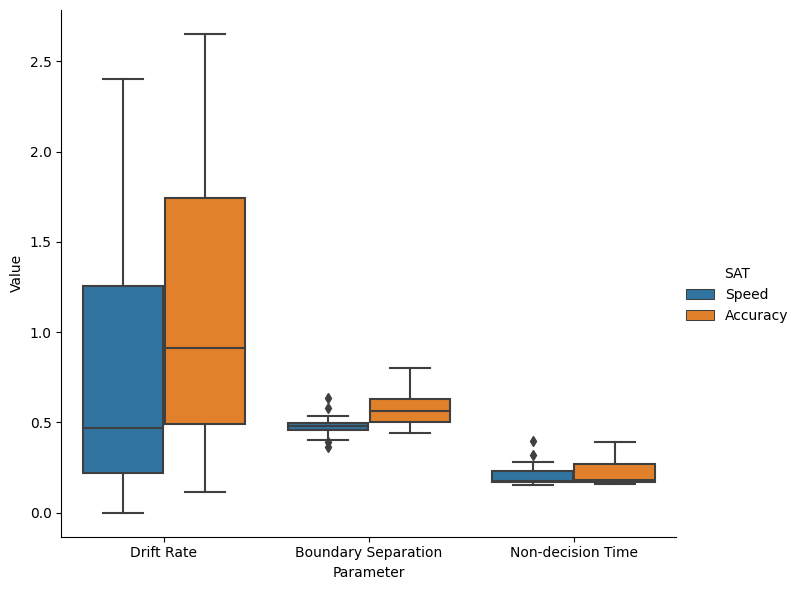

In [137]:
sns.catplot(data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", kind="box",
            height=6, aspect=7/6)

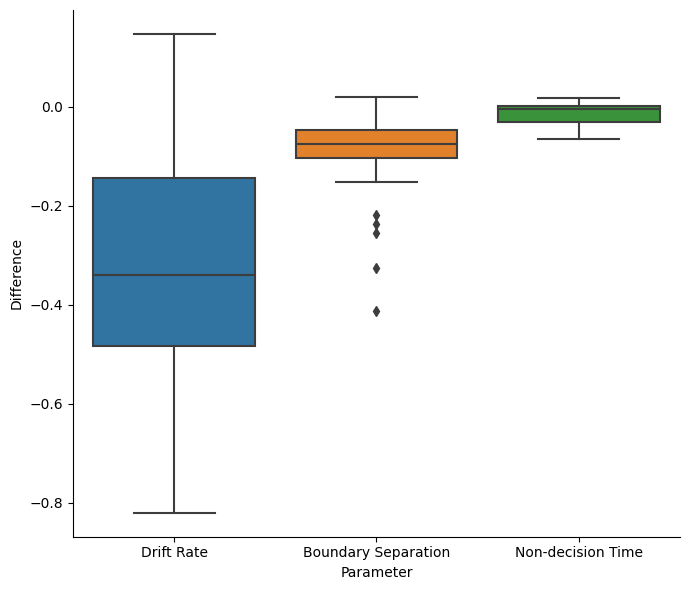

In [138]:
sns.catplot(data=df_dif_melted, x="Parameter", y="Difference", kind="box",
            height=6, aspect=7/6)

In [118]:
print(scipy.stats.ttest_rel(par_fitted_A[:,0], par_fitted_B[:,0]))
print(scipy.stats.ttest_rel(par_fitted_A[:,1], par_fitted_B[:,1]))
print(scipy.stats.ttest_rel(par_fitted_A[:,2], par_fitted_B[:,2]))
#print(scipy.stats.ttest_rel(par_fitted_A[:,3], par_fitted_B[:,3]))

Ttest_relResult(statistic=-7.251554225693432, pvalue=2.5620822709434898e-08)
Ttest_relResult(statistic=-5.959462269184176, pvalue=1.0869023040892684e-06)
Ttest_relResult(statistic=-3.987200890423949, pvalue=0.0003489007891813709)


In [123]:
model_fit

Model(name='Simple model (fitted)', drift=DriftConstant(drift=Fitted(0.7190179350092766, minval=0, maxval=6)), noise=NoiseConstant(noise=1), bound=BoundConstant(B=Fitted(0.7961914048092037, minval=0.1, maxval=10)), IC=ICPointSourceCenter(), overlay=OverlayNonDecision(nondectime=Fitted(0.18045336146173635, minval=0.1, maxval=1)), dx=0.001, dt=0.001, T_dur=4, fitresult=FitResult(fitting_method='differential_evolution', method='auto', loss='BIC', value=780.2893976186066, nparams=3, samplesize=529, mess=''))

In [124]:
model_fit.fitresult()

TypeError: 'FitResult' object is not callable

In [130]:
model_fit.get_fit_result().value()

780.2893976186066